In [1]:
!pip install matplotlib
!pip install networkx
!pip install tsplib95
!pip install vrplib

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import tsplib95
import itertools as it
import random
import vrplib
import math
from operator import attrgetter

In [3]:
def draw_graph(G):
    pos = {i: (data['x'], data['y']) for i, data in G.nodes(data=True)}
    plt.figure(figsize=(8, 6))    
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos)
    labels = {i: f'{i} (d={data["demand"]})' for i, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.title("Gráfico de nodos VRP (Vehicle Routing Problem)")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True)
    plt.show()

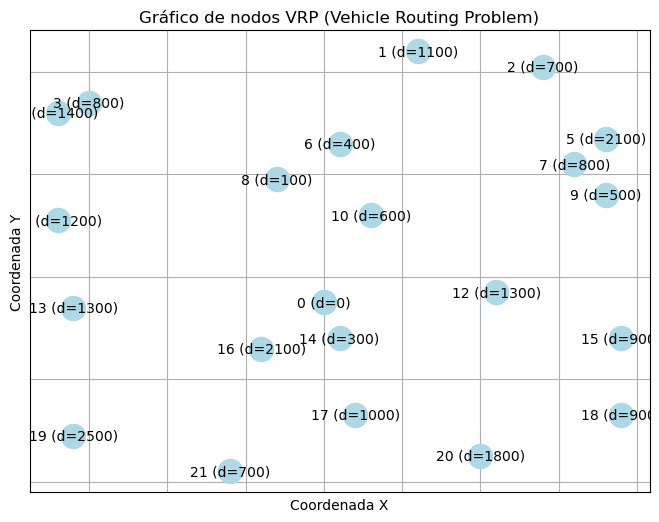

In [4]:
G = nx.MultiDiGraph()

instance = vrplib.read_instance("./Vrp-Set-E/E/E-n22-k4.vrp")
demand = instance['demand']
nodes_coords = instance['node_coord']
for i, (x, y) in enumerate(nodes_coords):
    G.add_node(i, x=int(x), y=int(y), demand=int(demand[i]))

G.edges(data=True)
draw_graph(G)

https://isprs-archives.copernicus.org/articles/XLII-4-W18/293/2019/isprs-archives-XLII-4-W18-293-2019.html

https://www.researchgate.net/publication/307875684_An_improved_artificial_bee_colony_algorithm_for_vehicle_routing_problem_with_time_windows_A_real_case_in_Dalian

https://www.thaiscience.info/Journals/Article/ECTI/10996999.pdf

## Classes e Métodos

In [5]:
def euclidean_distance(node1, node2):
    x1, y1 = G.nodes[node1]['x'], G.nodes[node1]['y']
    x2, y2 = G.nodes[node2]['x'], G.nodes[node2]['y']
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def calculate_path_qualitity(G, path):
    quality = 0
    for i in range(len(path) - 1):
        node = path[i]
        next_node = path[i + 1]
        quality += euclidean_distance(node, next_node)
    return quality

class Vehicle:
    def __init__(self):
        self.path = []
        self.capacity = 0
        self.quality = 0

    def calculate_quality(self, G):
        self.quality = calculate_path_qualitity(G, self.path)
        return self.quality

class ScoutBee:
    def __init__(self):
        self.vehicles = []

    def calculate_total_quality(self, G):
        self.total_quality = sum(vehicle.calculate_quality(G) for vehicle in self.vehicles)
        return self.total_quality

## Criação rotas inicias (Scout Bees)

In [10]:
vehicle_capacity = 6000
vehicles_quantity = 10
scout_bees_quantity = 30

scout_bees = []
for i in range(scout_bees_quantity):
    scout = ScoutBee()
    nodes_available = list(G)
    nodes_available.pop(0)
    random.shuffle(nodes_available)
    for _ in range(vehicles_quantity):
        if len(nodes_available) == 0:
            break
        vehicle = Vehicle()
        path = [0]
        tries = 0
        while vehicle.capacity < vehicle_capacity and len(nodes_available) > 0:
            node = nodes_available.pop(0)
            demand = G.nodes[node]['demand']
            if vehicle.capacity + demand > vehicle_capacity:
                tries += 1
                nodes_available.append(node)
                if tries == 2:
                    break
                continue
            path.append(node)
            vehicle.capacity += demand
        path.append(0)
        vehicle.path = path
        scout.vehicles.append(vehicle)
    scout_bees.append(scout)

for index, scout in enumerate(scout_bees):
    print(f"Abelha {index} | Qualidade {scout.calculate_total_quality(G)}")
    for vehicle in scout.vehicles:
        print(f"Caminho: {vehicle.path} | Capacidade: {vehicle.capacity} | Qualidade {vehicle.quality}")

Abelha 0 | Qualidade 935.5696990019381
Caminho: [0, 17, 14, 8, 10, 4, 2, 13, 0] | Capacidade: 5400 | Qualidade 209.95448509649972
Caminho: [0, 7, 19, 5, 0] | Capacidade: 5400 | Qualidade 197.24200117886494
Caminho: [0, 1, 20, 11, 6, 15, 9, 0] | Capacidade: 5900 | Qualidade 302.9605485385283
Caminho: [0, 21, 3, 12, 16, 18, 0] | Capacidade: 5800 | Qualidade 225.4126641880452
Abelha 1 | Qualidade 780.5678795243716
Caminho: [0, 11, 5, 7, 15, 17, 0] | Capacidade: 6000 | Qualidade 146.10854914041553
Caminho: [0, 8, 4, 6, 19, 9, 3, 0] | Capacidade: 5700 | Qualidade 259.130178951371
Caminho: [0, 21, 20, 18, 2, 14, 12, 0] | Capacidade: 5700 | Qualidade 209.25002910545365
Caminho: [0, 10, 13, 16, 1, 0] | Capacidade: 5100 | Qualidade 166.07912232713142
Abelha 2 | Qualidade 903.0273011584267
Caminho: [0, 9, 19, 14, 2, 7, 18, 8, 0] | Capacidade: 5800 | Qualidade 309.1070979774049
Caminho: [0, 5, 16, 12, 0] | Capacidade: 5500 | Qualidade 113.02609512313622
Caminho: [0, 15, 11, 10, 1, 20, 6, 0] | Cap